<a href="https://colab.research.google.com/github/gabrieljoseos/analiseentregas/blob/main/An%C3%A1liseDeDadosLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# Análise Exploratória de Dados de Logística


---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

## 1\. Contexto

Projeto de Analise de dados, contendo todos os passos necessários para uma estruturação e análise das iformações logísticas da empresa Loggi no Distrito Federal, com o objetivo de tratar os seguintes problemas:

- A quantidade de veiculos por HUB's de distribuição está subdimensionada?
- Os HUB's estão bem localizados considerando o número de entregas por bairro?

## 2\. Pacotes e bibliotecas

In [ ]:
!pip3 install geopandas

import json
import pandas as pd
import numpy as np
import geopandas
import seaborn as sns
import geopy
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


## 3\. Exploração de dados

### 3.1\. Coleta de dados







In [ ]:
# buscar o arquivo com os dados
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

In [ ]:
# Abrir o arquivo em dicionário

with open('deliveries.json', mode='r', encoding='utf8') as file:
  data_json = json.load(file)

In [ ]:
#Tamanho do dicionário
len(data_json)

199

In [ ]:
#Visualizar um exemplo do dicionário
visu = data_json[0]
# Visualizar o indice 0
visu

{'name': 'cvrp-2-df-33',
 'region': 'df-2',
 'origin': {'lng': -48.05498915846707, 'lat': -15.83814451122274},
 'vehicle_capacity': 180,
 'deliveries': [{'id': '313483a19d2f8d65cd5024c8d215cfbd',
   'point': {'lng': -48.11618888384239, 'lat': -15.848929154862294},
   'size': 9},
  {'id': '320c94b17aa685c939b3f3244c3099de',
   'point': {'lng': -48.11819489551, 'lat': -15.850772371049631},
   'size': 2},
  {'id': '3663b42f4b8decb33059febaba46d5c8',
   'point': {'lng': -48.11248339849675, 'lat': -15.84787055941764},
   'size': 1},
  {'id': 'e11ab58363c38d6abc90d5fba87b7d7',
   'point': {'lng': -48.11802268617869, 'lat': -15.846471025281456},
   'size': 2},
  {'id': '54cb45b7bbbd4e34e7150900f92d7f4b',
   'point': {'lng': -48.114898174591026, 'lat': -15.85805462185708},
   'size': 7},
  {'id': '71271df40c3188cda88266f9969a5a9',
   'point': {'lng': -48.120447632397045, 'lat': -15.8477803198514},
   'size': 10},
  {'id': 'be0cd4bee278b16f3473c8fb05e96464',
   'point': {'lng': -48.121801874785

In [ ]:
# Chaves
print(visu.keys())

dict_keys(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'])


In [ ]:
visu['name']

'cvrp-2-df-33'

In [ ]:
visu['region']

'df-2'

In [ ]:
visu['origin']['lat']

-15.83814451122274

In [ ]:
visu['origin']['lng']

-48.05498915846707

In [ ]:
visu['vehicle_capacity']

180

In [ ]:
visu['deliveries'][0]['point']['lng']

-48.11618888384239

### 3.2\. Wrangling da estrutura

In [ ]:
# Criar o Dataframe
deliveries_df = pd.DataFrame(data_json)
deliveries_df

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."
...,...,...,...,...,...
194,cvrp-1-df-59,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'fc800db1942651f8195f870c5930ca26', 'p..."
195,cvrp-0-df-87,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '3d50e820e1c16621e1fa19f1a7df0c56', 'p..."
196,cvrp-1-df-83,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'e6cffd090ce2a7bd0e0292f1ed9acd3', 'po..."
197,cvrp-2-df-7,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '51b1354b02a20d919b83bb664ea4d845', 'p..."


É percepitivel que há um dicionario em origin, para isso será necessário quebrar e normalizar para o criação de um dataframe emcima destee. Será usado a ferramenta **json_normalize.**

In [ ]:
# JSON Normalize na coluna "origin"
origin_df = pd.json_normalize(deliveries_df["origin"])
origin_df.head()

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


In [ ]:
# Junção dos dataframes "deliveries_df" e "hub_origin_df"
deliveries_df = pd.merge(left=deliveries_df, right=origin_df, how='inner', left_index=True, right_index=True)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


Como foi adicionado as duas novas colunas no final, para ficar mais correto com o datagframe incial, seeerá necessario trocar a ordem das colunas e retirar a coluna "origin".

In [ ]:
# troca da ordem das colunas e retirada da coluna origin
deliveries_df = deliveries_df.drop("origin", axis=1)
deliveries_df = deliveries_df[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]]
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


Como estas coordendas são refeerentes a um Hub de entrega, para ajudar na visualização, trocado o nome das duas coluna reeferenciando ao Hub.

In [ ]:
# Troca nome das colunas novas
deliveries_df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


É visto que a coluna deeliveries também apreesenta uma lista de dados na estrutura JSON, para este caso será necessário realizar o "explode" para transformar cada elemento eem uma linha. Depois realizado o achatamento das colunas.

In [ ]:
deliveries_exploded_df = deliveries_df[["deliveries"]].explode("deliveries")
deliveries_exploded_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [ ]:
# Quebra das linhas e renomeação das colunas para facilitar a visuaçlização.
deliveries_normalized_df = pd.concat([
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)
deliveries_normalized_df.head()

,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


Realizado o explode será necessário realizar a normalização deste dataframe para unir com o que esta manuseando.

In [ ]:
# tamanho do DataFrame retirado da coluna "deliveries"
len(deliveries_normalized_df)

636149

In [ ]:
# tamanho do DataFrame manuseado
len(deliveries_df)

199

Neste DataFrame há mais de 600000 linhas, maior que o original que contém 199 linhas.

Agora já é notado que tipo de concatenização deve ser realizado entre as tabelas, e que a coluna "deliveries" deve ser apagada.

In [ ]:
# Apagar a coluna "deliveries"
deliveries_df = deliveries_df.drop("deliveries", axis=1)
# Junção das tabelas contendo todos os linhas da tabela maior
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


Depois de alguns passos para realizar a normalização do DataFrame é possível fazer uma analise da estrutura.

## 4\. Manipulação

### 4.1\. Enriquecimento

Coordenadas de cada HUB

In [ ]:
hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]]
hub_df = hub_df.drop_duplicates().sort_values(by="region").reset_index(drop=True)
hub_df.head()

,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


Geolocalização reversa dos HUBs por 1 segundo

In [ ]:
geolocator = Nominatim(user_agent="gabriel_geocoder")
geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [ ]:
# Criação da coluna Coordenadas juntando latitude e longitude
hub_df["coordinates"] = hub_df["hub_lat"].astype(str)  + ", " + hub_df["hub_lng"].astype(str)
# Criação da coluna geodata para retornar o endereço de cada HUB
hub_df["geodata"] = hub_df["coordinates"].apply(geocoder)
hub_df.head()

,region,hub_lng,hub_lat,coordinates,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248, -47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334, -47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [ ]:
# Realização da Normalização da coluna geeodata para a busca de dados
hub_geodata_df = pd.json_normalize(hub_df["geodata"].apply(lambda data: data.raw))
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,46410411,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN
1,46401425,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172757199022,-47.893723539491205,highway,residential,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,70342-010,Brasil,br,SQS 303,Brasília,NaN,NaN
2,43777060,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.00001,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [ ]:
# Bucando o nome da cidade e bairro dos HUBs
hub_geodata_df = hub_geodata_df[["address.town", "address.suburb", "address.city"]]
hub_geodata_df.rename(columns={"address.town": "hub_town", "address.suburb": "hub_suburb", "address.city": "hub_city"}, inplace=True)
hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(), hub_geodata_df["hub_city"], hub_geodata_df["hub_town"])
hub_geodata_df["hub_suburb"] = np.where(hub_geodata_df["hub_suburb"].notna(), hub_geodata_df["hub_suburb"], hub_geodata_df["hub_city"])
hub_geodata_df = hub_geodata_df.drop("hub_town", axis=1)
hub_geodata_df.head()

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


O DataFrame "hub_geodata_df" com as informações de cidade e bairro irá enriqueecer o DataFrame principal.

In [ ]:
# Combinação entre os DataFrames "hub_df" e "hub_geodata" para inserir a coluna region
hub_df = pd.merge(left=hub_df, right=hub_geodata_df, left_index=True, right_index=True)
hub_df = hub_df[["region", "hub_suburb", "hub_city"]]
hub_df.head()

,region,hub_suburb,hub_city
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


In [ ]:
# Combinação entre os DataFrames "deliveries" e "hub_df" para inserção dos novos dados
deliveries_df = pd.merge(left=deliveries_df, right=hub_df, how="inner", on="region")
deliveries_df = deliveries_df[["name", "region", "hub_lng", "hub_lat", "hub_city", "hub_suburb", "vehicle_capacity", "delivery_size", "delivery_lng", "delivery_lat"]]
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055


Geocodificação reversa da entrega

Como o arquivo de dados da geocodificação reversa das entregas é grande para ser processada,nquanto o hub contem apenas 3 geolocalizações distintas, as entregas somam o total de 636.149, o que levaria em torno de 7 dias para serem consultadas no servidor do Nominatim, dada a restrição de uma consulta por segundo. Porém, foi disponibilizado o arquivo .csv das coordenadas de cada entrega.

In [ ]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv

In [ ]:
deliveries_geodata_df = pd.read_csv("deliveries-geodata.csv")
deliveries_geodata_df.head()

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


Dados devidamente carregados, proximo passo será combinar os DataFrames

In [ ]:
# Combinação entre o DataFrame de coordenadas das entregas e o DataFrame principal
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_geodata_df[["delivery_city", "delivery_suburb"]], how="inner", left_index=True, right_index=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


### 4.2\. Estrutura

In [ ]:
deliveries_df.head(5)

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


Quantidade de linas e colunas:

In [ ]:
deliveries_df.shape

(636149, 12)

Colunas do DataFrame

In [ ]:
deliveries_df.columns

Index(['name', 'region', 'hub_lng', 'hub_lat', 'hub_city', 'hub_suburb',
       'vehicle_capacity', 'delivery_size', 'delivery_lng', 'delivery_lat',
       'delivery_city', 'delivery_suburb'],
      dtype='object')

Tipo de dados de cada coluna e contagem de nulos


In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636149 entries, 0 to 636148
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   hub_city          636149 non-null  object 
 5   hub_suburb        636149 non-null  object 
 6   vehicle_capacity  636149 non-null  int64  
 7   delivery_size     636149 non-null  int64  
 8   delivery_lng      636149 non-null  float64
 9   delivery_lat      636149 non-null  float64
 10  delivery_city     634447 non-null  object 
 11  delivery_suburb   476264 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 79.2+ MB


In [ ]:
deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
hub_city            False
hub_suburb          False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
delivery_city        True
delivery_suburb      True
dtype: bool

É notado que as colunas delivery_city e delivery_suburb possuem dados nulos. Necessário validar o quão devasado está os dados.

In [ ]:
# Porcentagem de dados nulos da coluna "delivery_city"
100 * (deliveries_df["delivery_city"].isna().sum() / len(deliveries_df))

0.26754738276724477

In [ ]:
# Porcentagem de dados nules da coluna "delevery_suburb"
100 * (deliveries_df["delivery_suburb"].isna().sum() / len(deliveries_df))

25.133262804783158

Obs: 1/4 dos dados da coluna delevery_suburb estão nulos, o que invalida o uso desta coluna.

### 4.2\. Análise

**Atributos categóricos**



In [ ]:
deliveries_df[['name', 'region']].select_dtypes('object').describe().transpose()

,count,unique,top,freq
name,636149,199,cvrp-1-df-87,5636
region,636149,3,df-1,304708


É visto que há 3 Hubs, onde o df-1 é o com mais entregas. e o deleverie com mais frequencia é o "cvrp-1-df-87"

**Atributos numéricos**

In [ ]:
deliveries_df.drop(["name", "region"], axis=1).select_dtypes('int64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
delivery_size,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


A capacidade de veiculos ée igual para todos os Hubs, porém a quantidade de entregas é diferente para cada Hub

**Porcentagem das 10 cidades com mais entregas**

In [ ]:
perc_deliveries = deliveries_df[["delivery_city"]].value_counts() / len(deliveries_df)
perc_deliveries.sort_values(ascending=False).head(10)

delivery_city       
Brasília                0.234195
Taguatinga              0.071625
Sudoeste / Octogonal    0.069504
Ceilândia               0.059661
Águas Claras            0.058293
Guará                   0.055619
Lago Sul                0.045620
Sobradinho              0.045412
Lago Norte              0.040832
Gama                    0.034880
dtype: float64

**Quantidade de entrega por HUB**

In [ ]:
hub_df_sum = deliveries_df.groupby('region')['delivery_size'].sum()
hub_df_sum

region
df-0     385932
df-1    1681582
df-2    1439010
Name: delivery_size, dtype: int64

**Top 10 - Tamanho de entregas**

In [ ]:
top10_entregas = deliveries_df[['name', 'region',	'hub_suburb',	'delivery_size']]
top10_entregas = top10_entregas.sort_values(by='delivery_size', ascending=False)
top10_entregas.head(10)

,name,region,hub_suburb,delivery_size
116327,cvrp-2-df-82,df-2,Taguatinga,10
440014,cvrp-1-df-66,df-1,Asa Sul,10
259193,cvrp-2-df-62,df-2,Taguatinga,10
203593,cvrp-2-df-81,df-2,Taguatinga,10
71395,cvrp-2-df-84,df-2,Taguatinga,10
440079,cvrp-1-df-66,df-1,Asa Sul,10
440078,cvrp-1-df-66,df-1,Asa Sul,10
203613,cvrp-2-df-81,df-2,Taguatinga,10
96669,cvrp-2-df-35,df-2,Taguatinga,10
440044,cvrp-1-df-66,df-1,Asa Sul,10


### 4.3. Criação do Mapa

In [ ]:
# Busca do mapa do Distrito Federal
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

In [ ]:
# Coordenadas do Distrito Federal
mapa = geopandas.read_file("distrito-federal.shp")
mapa = mapa.loc[[0]]
mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


In [ ]:
# Mapa dos HUs
hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]].drop_duplicates().reset_index(drop=True)
geo_hub_df = geopandas.GeoDataFrame(hub_df, geometry=geopandas.points_from_xy(hub_df["hub_lng"], hub_df["hub_lat"]))
geo_hub_df.head()

,region,hub_lng,hub_lat,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


In [ ]:
geo_deliveries_df = geopandas.GeoDataFrame(deliveries_df, geometry=geopandas.points_from_xy(deliveries_df["delivery_lng"], deliveries_df["delivery_lat"]))
geo_deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.11490 -15.85805)


## 5\. Visualização

<ipython-input-49-b99a62796c7f>:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


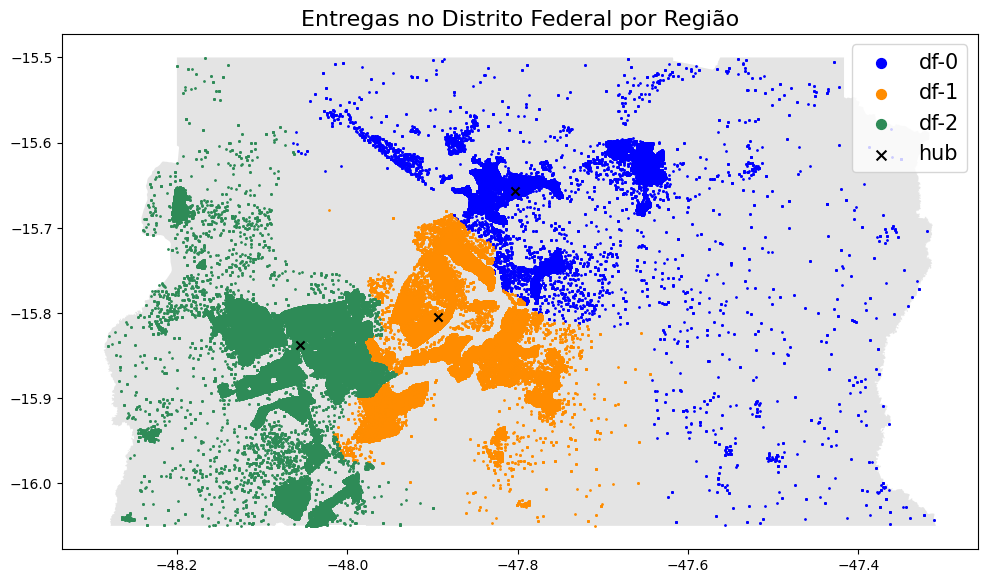

In [ ]:
# cria o plot vazio
fig, ax = plt.subplots(figsize = (30/2.54, 30/2.54))

# plot mapa do distrito federal
mapa.plot(ax=ax, alpha=0.6, color="lightgrey")

# plot das entregas
geo_deliveries_df.query("region == 'df-0'").plot(ax=ax, markersize=1, color="blue", label="df-0")
geo_deliveries_df.query("region == 'df-1'").plot(ax=ax, markersize=1, color="darkorange", label="df-1")
geo_deliveries_df.query("region == 'df-2'").plot(ax=ax, markersize=1, color="seagreen", label="df-2")

# plot dos hubs
geo_hub_df.plot(ax=ax, markersize=35, marker="x", color="black", label="hub")

# plot da legenda
plt.title("Entregas no Distrito Federal por Região", fontdict={"fontsize": 16})
lgnd = plt.legend(prop={"size": 15})
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

Insight:
- O Hub df-0 tem uma maior disperção de entregas
- O Hub df-1 tem entregas em uma concentração
- O Hub df-2 é um conjunto dos dois hubs anteriores, há uma concentração de entregas, mas também há uma pequena disperção.


<ipython-input-50-1f2f59d95dcb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  hub_df_grafico = sns.barplot(data=hub_df_sum, x='region', y='delivery_size', palette='deep')


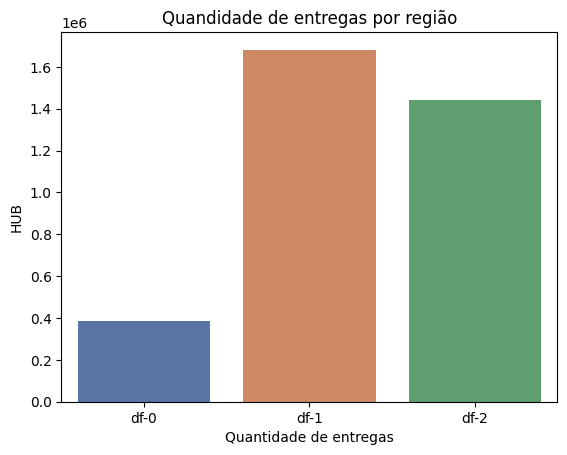

In [ ]:
hub_df_sum = pd.DataFrame(hub_df_sum)
hub_df_grafico = sns.barplot(data=hub_df_sum, x='region', y='delivery_size', palette='deep')
hub_df_grafico.set(title="Quandidade de entregas por região", xlabel="Quantidade de entregas", ylabel="HUB");

Insight:
- Hub df-0 tem uma quantidade de entregas bem menor do que os demais, sendo o df-1 com maior entrega.
- Necessária uma avialiação se a quantidade de veiculos por região está adequada ou será necessaria uma reavaliação

TOP 10: Entregas por Bairro

<ipython-input-52-d7867d96955d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  top10_entregas_grafic = sns.barplot(data=top10_entregas, x='hub_suburb', y='delivery_size', palette='deep')


[Text(0.5, 1.0, 'TOP 10: Entregas por Bairro'),
 Text(0.5, 0, 'Bairro'),
 Text(0, 0.5, 'tamanho da entrega')]

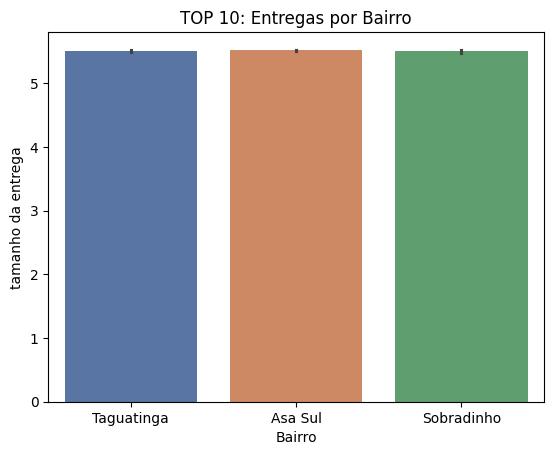

In [ ]:
top10_entregas_grafic = sns.barplot(data=top10_entregas, x='hub_suburb', y='delivery_size', palette='deep')
top10_entregas_grafic.set(title="TOP 10: Entregas por Bairro", xlabel="Bairro", ylabel="tamanho da entrega")

Insight:
- É visto que as 10 entregas com maior tamanho são de bairros localizados no HUB df-1, o com a maior quatidade e concentração de entregas. Logo, Uma maior concentração de esforços para realizar as entregas no HUB df-1 pode tornar a empresa mais produtiva e aumentar o número e qualidade de entrega nessa região.